# Předpoklady lineární regrese

## 1. Cíl lekce

**⚠️ Lineární regrese funguje správně jen když jsou splněny určité podmínky!**

Naučíte se:
- **4 ZÁKLADNÍ PŘEDPOKLADY** lineární regrese
- Jak **ROZPOZNAT** když něco není v pořádku
- Co dělat když předpoklady **NEJSOU** splněny

## 2. Proč jsou předpoklady důležité?

### Představte si navigaci v autě:
- Navigace počítá trasu pro **normální silnice**
- Co když jedete **terénním autem přes pole**?
- Navigace vám dá nějaký čas, ale bude **ŠPATNĚ**!

### Stejně funguje lineární regrese:
- Model **VŽDY** dá nějaký výsledek
- Ale pokud nejsou splněny předpoklady, výsledek **NENÍ SPRÁVNÝ**
- Můžete dostat zdánlivě významné výsledky, které jsou **NESMYSL**!

## 3. PŘEDPOKLAD 1: LINEARITA

### Co to znamená?
**Vztah mezi X a Y musí být PŘÍMKOVÝ** (nebo alespoň přibližně).

### Příklad ze života:
- ✅ **LINEÁRNÍ**: Každá hodina práce → stejná odměna (100 Kč/hod)
- ❌ **NELINEÁRNÍ**: Učení se na zkoušku → první hodiny pomáhají hodně, další méně

### Jak to poznám?
**Bodový graf (scatter plot)**:
- Body by měly tvořit **přibližně přímku**
- Ne vlnovku, parabolu nebo jiný tvar

### Co když to není lineární?
- Model bude **špatně předpovídat**
- Použijte **transformaci** dat (např. logaritmus)
- Nebo jiný typ modelu

## 4. PŘEDPOKLAD 2: NEZÁVISLOST POZOROVÁNÍ

### Co to znamená?
**Každé měření je nezávislé na ostatních** - hodnota jednoho neovlivňuje druhé.

### Příklad ze života:
- ✅ **NEZÁVISLÉ**: Výška různých lidí na ulici
- ❌ **ZÁVISLÉ**: Teplota měřená každou hodinu (hodnoty spolu souvisí)

### Kdy je to problém?
- **Časové řady** - data v čase
- **Opakovaná měření** - stejná osoba měřená vícekrát
- **Skupinová data** - studenti ze stejné třídy

### Co když data nejsou nezávislá?
- Výsledky testů budou **nespolehlivé**
- Použijte speciální metody pro časové řady

## 5. PŘEDPOKLAD 3: KONSTANTNÍ ROZPTYL (Homoskedasticita)

### Co to znamená?
**Chyby předpovědi jsou stejně velké** pro malé i velké hodnoty.

### Příklad ze života:
**Předpovídáme příjem podle vzdělání:**
- Lidé se ZŠ: příjem 20-30 tisíc (malý rozptyl)
- Lidé s VŠ: příjem 30-200 tisíc (VELKÝ rozptyl)
- → Rozptyl NENÍ konstantní!

### Jak to poznám?
**Graf reziduí (chyb)**:
- Chyby by měly být **rovnoměrně rozptýlené**
- Neměly by tvořit **trychtýř** (rozšiřovat se)

### Co když rozptyl není konstantní?
- Statistické testy jsou **nespolehlivé**
- Použijte **transformaci** Y (např. logaritmus)

## 6. PŘEDPOKLAD 4: NORMALITA CHYB

### Co to znamená?
**Chyby modelu mají normální rozdělení** - většina malých, málo velkých.

### Jak si to představit?
- Většina předpovědí je **téměř správná** (malá chyba)
- Občas se model **hodně splete** (velká chyba)
- Chyby nahoru a dolů jsou **stejně časté**

### DŮLEŽITÉ:
⚠️ **NE** normalita X nebo Y!
✅ Normalita **CHYB** (reziduí)!

### Kdy je to důležité?
- **Velké vzorky (n > 30)**: Méně důležité
- **Malé vzorky (n < 30)**: KRITICKÉ!

### Jak to poznám?
**Histogram chyb**:
- Měl by vypadat jako **zvon**
- Ne šikmý na jednu stranu

## 7. Shrnutí předpokladů

### Kontrolní seznam před použitím regrese:

| Předpoklad | Jak kontrolovat | Co když není splněn |
|------------|-----------------|---------------------|
| **1. Linearita** | Bodový graf | Transformace, jiný model |
| **2. Nezávislost** | Znalost dat | Časové řady metody |
| **3. Konstantní rozptyl** | Graf reziduí | Transformace Y |
| **4. Normalita chyb** | Histogram reziduí | Transformace, více dat |

### ⚠️ Zlaté pravidlo:
**VŽDY zkontrolujte předpoklady PŘED interpretací výsledků!**

## 8. Import knihoven

Nyní, když rozumíme teorii, můžeme importovat knihovny pro praktické ukázky:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Nastavení pro hezčí grafy
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 11

# Nastavíme seed pro reprodukovatelnost
np.random.seed(42)

## 9. UKÁZKA: Kontrola linearity

In [2]:
# Vytvoříme lineární a nelineární data
x = np.linspace(1, 10, 50)

# Lineární vztah
y_linear = 2 * x + 3 + np.random.normal(0, 1, 50)

# Nelineární vztah (parabola)
y_nonlinear = 0.5 * x**2 + np.random.normal(0, 2, 50)

# Vizualizace
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graf 1: Lineární vztah
ax1.scatter(x, y_linear, alpha=0.6, s=50, color='green')
ax1.plot(x, 2*x + 3, 'g--', linewidth=2, label='Ideální přímka')
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_title('✅ LINEÁRNÍ vztah - OK pro regresi', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Graf 2: Nelineární vztah
ax2.scatter(x, y_nonlinear, alpha=0.6, s=50, color='red')
# Pokusíme se fitovat přímku
model = LinearRegression()
model.fit(x.reshape(-1, 1), y_nonlinear)
y_pred = model.predict(x.reshape(-1, 1))
ax2.plot(x, y_pred, 'r--', linewidth=2, label='Špatná přímka')
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Y', fontsize=12)
ax2.set_title('❌ NELINEÁRNÍ vztah - špatné pro regresi', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

C:\Users\petrrozkosny\AppData\Local\Temp\ipykernel_18284\386007520.py:35: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
C:\Users\petrrozkosny\AppData\Local\Temp\ipykernel_18284\386007520.py:35: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  plt.tight_layout()
C:\Users\petrrozkosny\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\petrrozkosny\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


## 10. UKÁZKA: Kontrola konstantního rozptylu

In [3]:
# Data s konstantním rozptylem
x_const = np.linspace(1, 10, 50)
y_const = 3 * x_const + np.random.normal(0, 2, 50)  # Konstantní rozptyl = 2

# Data s rostoucím rozptylem
x_var = np.linspace(1, 10, 50)
# Rozptyl roste s x
y_var = 3 * x_var + np.random.normal(0, 1, 50) * x_var * 0.5

# Fitujeme modely
model_const = LinearRegression()
model_const.fit(x_const.reshape(-1, 1), y_const)
pred_const = model_const.predict(x_const.reshape(-1, 1))
resid_const = y_const - pred_const

model_var = LinearRegression()
model_var.fit(x_var.reshape(-1, 1), y_var)
pred_var = model_var.predict(x_var.reshape(-1, 1))
resid_var = y_var - pred_var

# Vizualizace
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Konstantní rozptyl - scatter plot
axes[0, 0].scatter(x_const, y_const, alpha=0.6, s=50, color='green')
axes[0, 0].plot(x_const, pred_const, 'g-', linewidth=2)
axes[0, 0].set_xlabel('X', fontsize=12)
axes[0, 0].set_ylabel('Y', fontsize=12)
axes[0, 0].set_title('✅ Konstantní rozptyl - data', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Konstantní rozptyl - rezidua
axes[0, 1].scatter(pred_const, resid_const, alpha=0.6, s=50, color='green')
axes[0, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0, 1].set_xlabel('Předpovězené hodnoty', fontsize=12)
axes[0, 1].set_ylabel('Rezidua (chyby)', fontsize=12)
axes[0, 1].set_title('✅ Rovnoměrné rozptýlení chyb', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Rostoucí rozptyl - scatter plot
axes[1, 0].scatter(x_var, y_var, alpha=0.6, s=50, color='red')
axes[1, 0].plot(x_var, pred_var, 'r-', linewidth=2)
axes[1, 0].set_xlabel('X', fontsize=12)
axes[1, 0].set_ylabel('Y', fontsize=12)
axes[1, 0].set_title('❌ Rostoucí rozptyl - data', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Rostoucí rozptyl - rezidua
axes[1, 1].scatter(pred_var, resid_var, alpha=0.6, s=50, color='red')
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 1].set_xlabel('Předpovězené hodnoty', fontsize=12)
axes[1, 1].set_ylabel('Rezidua (chyby)', fontsize=12)
axes[1, 1].set_title('❌ Trychtýř - rostoucí chyby!', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\petrrozkosny\AppData\Local\Temp\ipykernel_18284\1635103042.py:56: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()


C:\Users\petrrozkosny\AppData\Local\Temp\ipykernel_18284\1635103042.py:56: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  plt.tight_layout()
C:\Users\petrrozkosny\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\petrrozkosny\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


## 11. UKÁZKA: Kontrola normality chyb

C:\Users\petrrozkosny\AppData\Local\Temp\ipykernel_18284\4174968138.py:37: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
C:\Users\petrrozkosny\AppData\Local\Temp\ipykernel_18284\4174968138.py:37: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  plt.tight_layout()
C:\Users\petrrozkosny\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\petrrozkosny\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


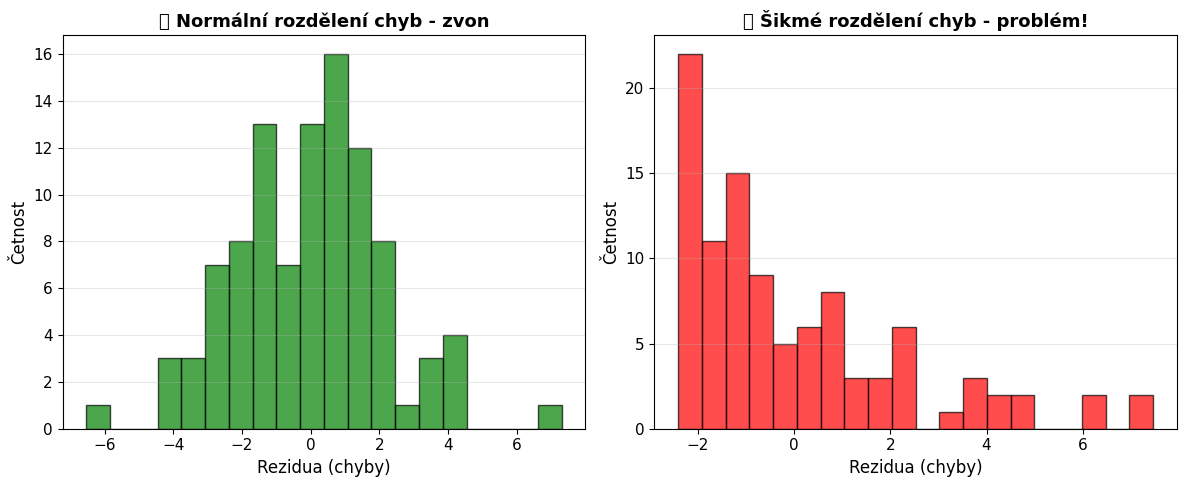

In [4]:
# Data s normálními chybami
x_norm = np.linspace(1, 10, 100)
errors_normal = np.random.normal(0, 2, 100)  # Normální rozdělení
y_norm = 2 * x_norm + 5 + errors_normal

# Data s šikmými chybami
x_skew = np.linspace(1, 10, 100)
errors_skewed = np.random.exponential(scale=2, size=100) - 2  # Šikmé rozdělení
y_skew = 2 * x_skew + 5 + errors_skewed

# Fitujeme modely
model_norm = LinearRegression()
model_norm.fit(x_norm.reshape(-1, 1), y_norm)
resid_norm = y_norm - model_norm.predict(x_norm.reshape(-1, 1))

model_skew = LinearRegression()
model_skew.fit(x_skew.reshape(-1, 1), y_skew)
resid_skew = y_skew - model_skew.predict(x_skew.reshape(-1, 1))

# Vizualizace
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram normálních reziduí
axes[0].hist(resid_norm, bins=20, edgecolor='black', alpha=0.7, color='green')
axes[0].set_xlabel('Rezidua (chyby)', fontsize=12)
axes[0].set_ylabel('Četnost', fontsize=12)
axes[0].set_title('✅ Normální rozdělení chyb - zvon', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Histogram šikmých reziduí
axes[1].hist(resid_skew, bins=20, edgecolor='black', alpha=0.7, color='red')
axes[1].set_xlabel('Rezidua (chyby)', fontsize=12)
axes[1].set_ylabel('Četnost', fontsize=12)
axes[1].set_title('❌ Šikmé rozdělení chyb - problém!', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()